# **Book recommender systems**

Source of data:   Book-Crossing Dataset http://www2.informatik.uni-freiburg.de/~cziegler/BX/

The aim of this Book Recommendation Engine, or “Book Recommender” is to provide interesting book recommendations to the user.

In [ ]:
#Import Libraries 

import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import Books csv
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [ ]:
#Inspecting Books Data

print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
#dropping last three columns in books dataframe containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
#Rename column. Remove hyphen to make it easier to work with
books.columns = ['ISBN', 'Title', 'Author', 'PublicationYear', 'publisher']

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ISBN             271360 non-null  object
 1   Title            271360 non-null  object
 2   Author           271359 non-null  object
 3   PublicationYear  271360 non-null  object
 4   publisher        271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
#As we can see Year of publication is in object so we need to change that to intingers
#So we investigate the Year of publication column.
books.PublicationYear.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
#As we can see from above, there is some inconsistancies in the column, we have some Authors in the Year of publication column. 
#So we take a closer look at these entries in order to know to decide next steps. 

books.loc[books.PublicationYear == 'Gallimard',:]

,ISBN,Title,Author,PublicationYear,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
#Here we are putting correct infomation in the correct column.

books.loc[books.ISBN == '2070426769','PublicationYear'] = 2003
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"

In [ ]:
books.loc[books.ISBN == '2070426769',:]

,ISBN,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,2003,Gallimard,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio


In [ ]:
#So we do the same for the other Auther in the wrong column.

books.loc[books.PublicationYear == 'DK Publishing Inc',:]

,ISBN,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,NaN,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,NaN,NaN


In [ ]:
books.loc[books.ISBN == '078946697X','PublicationYear'] = 2000
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers"
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum)"

books.loc[books.ISBN == '0789466953','PublicationYear'] = 2000
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers"
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley)"


In [ ]:
#Problem fixed
books.loc[(books.ISBN == '078946697X') | (books.ISBN == '0789466953'),:]

,ISBN,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,2000,DK Publishing Inc,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers",Michael Teitelbaum)
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,2000,DK Publishing Inc,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers",James Buckley)


In [ ]:
#Now with the issues solved in year of publication , we change it to numerical (intinger)
books.PublicationYear = pd.to_numeric(books.PublicationYear)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ISBN             271360 non-null  object
 1   Title            271360 non-null  object
 2   Author           271359 non-null  object
 3   PublicationYear  271360 non-null  int64 
 4   publisher        271358 non-null  object
 5   bookTitle        3 non-null       object
 6   bookAuthor       3 non-null       object
dtypes: int64(1), object(6)
memory usage: 14.5+ MB


In [ ]:
sorted(books['PublicationYear'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [ ]:
#Assuming 0 is an incorrect entry since there is no year that is 0. And since we are in 2020 we assume that any books above 2021 is also an incorrect entry.
#Here we view books with Publication year entry of '0'
books.loc[books.PublicationYear == 0,:]

,ISBN,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",NaN,NaN
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),NaN,NaN
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,NaN,NaN
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,NaN,NaN
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,NaN,NaN
...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,NaN,NaN
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,NaN,NaN
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,NaN,NaN
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,NaN,NaN


In [ ]:
#Here we view books with Publication year entry after 2021
books.loc[books.PublicationYear > 2021,:]

,ISBN,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS),Coville,2030,Aladdin,NaN,NaN
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS),Bruce Coville,2030,Aladdin,NaN,NaN
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,NaN,NaN
80264,0140301690,Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books),Lewis Carroll,2050,Puffin Books,NaN,NaN
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,NaN,NaN
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,NaN,NaN
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,NaN,NaN
192993,0870446924,"Field Guide to the Birds of North America, 3rd Ed.",National Geographic Society,2030,National Geographic,NaN,NaN
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,NaN,NaN
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,NaN,NaN


In [ ]:
#import ratings data
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")


In [ ]:
#Inspecting Ratings Data
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['User-ID', 'ISBN', 'Book-Rating']


In [ ]:
#Rename Rating columns . Removed hyphen to make it easier to work with. 
ratings.columns = ['userID', 'ISBN', 'Rating']

In [ ]:
ratings.head(5)

,userID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userID  1149780 non-null  int64 
 1   ISBN    1149780 non-null  object
 2   Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.agg(['count', 'size', 'nunique'])

,userID,ISBN,Rating
count,1149780,1149780,1149780
size,1149780,1149780,1149780
nunique,105283,340556,11


In [ ]:
ratings.describe()

,userID,Rating
count,1149780.000,1149780.000
mean,140386.395,2.867
std,80562.278,3.854
min,2.000,0.000
25%,70345.000,0.000
50%,141010.000,0.000
75%,211028.000,7.000
max,278854.000,10.000


In [ ]:
ratings.Rating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

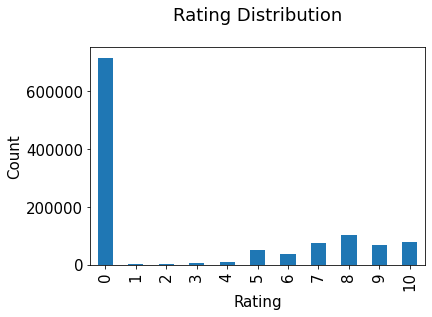

In [ ]:
#Visualize Rating distribution

plt.rc("font", size=15)
ratings.Rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [ ]:
#import Users data
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [ ]:
#Inspecting Users Data
print(users.shape)
print(list(users.columns))
users.head()

(278858, 3)
['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
sorted(users.Age.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


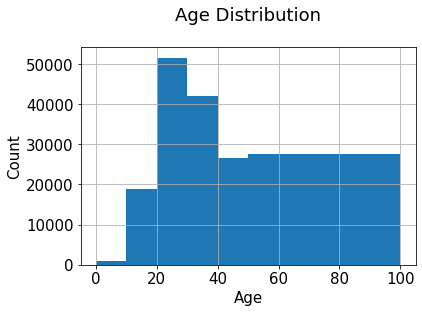

In [ ]:
#Vizualize Age Distribution 

users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [ ]:
#We assume that users below 5 and abouve 100 are entered in error . So we replace those with NAN then replace them with the mean. 

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [ ]:
users.Age = users.Age.fillna(users.Age.mean())

In [ ]:
sorted(users.Age.unique())

[5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 34.74663765822785,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0]

In [ ]:
users.columns = ['userID', 'Location', 'Age']

In [ ]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",34.747
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",34.747
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",34.747


In [ ]:
books.shape

(271360, 7)

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
users.shape

(278858, 3)

In [ ]:
books_ratings = ratings.join(books.set_index('ISBN'), on='ISBN')

In [ ]:
books_ratings.head(5)

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.000,Heinle,NaN,NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.000,Cambridge University Press,NaN,NaN
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.000,Cambridge University Press,NaN,NaN


In [ ]:
books_ratings.shape

(1149780, 9)

In [ ]:
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   userID           1149780 non-null  int64  
 1   ISBN             1149780 non-null  object 
 2   Rating           1149780 non-null  int64  
 3   Title            1031136 non-null  object 
 4   Author           1031135 non-null  object 
 5   PublicationYear  1031136 non-null  float64
 6   publisher        1031134 non-null  object 
 7   bookTitle        4 non-null        object 
 8   bookAuthor       4 non-null        object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.9+ MB


In [ ]:
print(f'Number of books with no title: {books_ratings.Title.isnull().sum()}')
print(f'This represents {len(books_ratings)/books_ratings.Title.isnull().sum():.2f}% of the ratings dataset.')

Number of books with no title: 118644
This represents 9.69% of the ratings dataset.


In [ ]:
# We can remove the entires in the books_ratings table with no title as it would not be of any value in the recommender system.
books_ratings.dropna(subset=['Title'], inplace=True)

In [ ]:
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   userID           1031136 non-null  int64  
 1   ISBN             1031136 non-null  object 
 2   Rating           1031136 non-null  int64  
 3   Title            1031136 non-null  object 
 4   Author           1031135 non-null  object 
 5   PublicationYear  1031136 non-null  float64
 6   publisher        1031134 non-null  object 
 7   bookTitle        4 non-null        object 
 8   bookAuthor       4 non-null        object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


In [ ]:
# Lets check if a book has multiple ISBNs
books_ratings.groupby('Title').ISBN.nunique().sort_values(ascending=False)[:10]

Title
Selected Poems                    26
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Dracula                           20
Jane Eyre                         19
Pride and Prejudice               18
The Night Before Christmas        18
Great Expectations                17
Name: ISBN, dtype: int64

In [ ]:
multiple_ISBN = books_ratings.groupby('Title').ISBN.nunique()
multiple_ISBN.value_counts()

1     221255
2     14880 
3     2928  
4     1065  
5     429   
6     217   
7     116   
8     69    
9     39    
10    23    
11    14    
12    11    
13    8     
15    3     
16    3     
20    3     
18    2     
14    1     
17    1     
19    1     
21    1     
24    1     
26    1     
Name: ISBN, dtype: int64

In [ ]:
# We can see that most of the books have only 1 ISBN number associated, but some books have multiple ISBNs. Lets have only 1 ISBN with single book. 
# We will assign the 1st ISBN to the book title if it has multiple ISBNs.

In [ ]:
# Book titles with multiple ISBNs
multiple_ISBNs = multiple_ISBN.where(multiple_ISBN>1)
multiple_ISBNs.dropna(inplace=True) # remove NaNs, which in this case is books with a single ISBN number
print(f'Book titles with multiple ISBN numbers: {len(multiple_ISBNs)}')

Book titles with multiple ISBN numbers: 19816


In [ ]:
# Create dictionary for books with multiple isbns
def make_ISBN_dict(df):
     Title_ISBN_dict = {}
     for Title in multiple_ISBNs.index:
         ISBN_series = df.loc[df.Title==Title].ISBN.unique() # returns only the unique ISBNs
         Title_ISBN_dict[Title] = ISBN_series.tolist()
     return Title_ISBN_dict

%time dict_unique_isbn = make_ISBN_dict(books_ratings)

CPU times: user 40min 59s, sys: 19.1 s, total: 41min 18s
Wall time: 45min 39s


In [ ]:
import pickle

In [ ]:
with open('multiple_ISBN_dict.pickle', 'wb') as handle:
     pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('multiple_ISBN_dict.pickle', 'rb') as handle:
    multiple_ISBN_dict = pickle.load(handle)

In [ ]:
print(f'Book titles with multiple ISBN numbers: {len(multiple_ISBN_dict)}')

Book titles with multiple ISBN numbers: 19816


In [ ]:
# Lets add 'unique_ISBN' column to 'books_ratings' dataframe such that it includes 1st ISBN if multiple ISBNs or just the ISBN if only 1 ISBN is present.
def add_unique_ISBN_col(df):
    df['unique_ISBN'] = df.apply(lambda row: multiple_ISBN_dict[row.Title][0] if row.Title in multiple_ISBN_dict.keys() else row.ISBN, axis=1)
    return df

books_ratings = add_unique_ISBN_col(books_ratings)

In [ ]:
books_ratings.head(5)

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.000,Heinle,NaN,NaN,0155061224
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN,0446520802
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.000,Cambridge University Press,NaN,NaN,052165615X
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.000,Cambridge University Press,NaN,NaN,0521795028


In [ ]:
# Join users and books_ratings dataframes
books_users_ratings = books_ratings.join(users.set_index('userID'), on='userID')

AttributeError: 'list' object has no attribute 'set_index'

In [ ]:
books_users_ratings.head(5)

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.000,Heinle,NaN,NaN,0155061224,"seattle, washington, usa",34.747
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN,0446520802,"h, new south wales, australia",16.000
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.000,Cambridge University Press,NaN,NaN,052165615X,"rijeka, n/a, croatia",16.000
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.000,Cambridge University Press,NaN,NaN,0521795028,"rijeka, n/a, croatia",16.000


In [ ]:
books_users_ratings.shape

(1031136, 12)

In [ ]:
#importing the packages
import pandas as pd
import sys
from scipy import sparse 
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

#importing warnings to turn off future warnings
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
books_users_ratings.head(5)

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.000,Heinle,NaN,NaN,0155061224,"seattle, washington, usa",34.747
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN,0446520802,"h, new south wales, australia",16.000
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.000,Cambridge University Press,NaN,NaN,052165615X,"rijeka, n/a, croatia",16.000
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.000,Cambridge University Press,NaN,NaN,0521795028,"rijeka, n/a, croatia",16.000


In [ ]:
books_users_ratings.shape

(1031136, 12)

In [ ]:
#File is cleaned and now prepare for our recommender system
books_users_ratings.to_csv('Books-Users-Ratings')

In [ ]:
books_users_ratings = books_users_ratings.dropna(axis = 0, subset = ['Title'])

In [ ]:
book_ratingCount = (books_users_ratings.
    groupby(by = ['Title'])['Rating'].
    count().
    reset_index().
    rename(columns = {'Rating' : 'TotalRatingCount'})
    [['Title', 'TotalRatingCount']] 
    )
book_ratingCount.head(10)

,Title,TotalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
5,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1
6,Dark Justice,1
7,Deceived,2
8,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",10
9,Final Fantasy Anthology: Official Strategy Guide (Brady Games),4


In [ ]:
rating_with_totalRatingCount = books_users_ratings.merge(book_ratingCount, left_on = 'Title', right_on = 'Title', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747,60
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.000,Heinle,NaN,NaN,0155061224,"seattle, washington, usa",34.747,14
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN,0446520802,"h, new south wales, australia",16.000,650
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.000,Cambridge University Press,NaN,NaN,052165615X,"rijeka, n/a, croatia",16.000,1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.000,Cambridge University Press,NaN,NaN,0521795028,"rijeka, n/a, croatia",16.000,1


In [ ]:
rating_with_totalRatingCount.sort_values('TotalRatingCount', ascending=False).head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
259720,69232,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"mooresville, north carolina, usa",55.000,2502
1015828,271532,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"burlington, ontario, canada",34.747,2502
164090,40110,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"lincoln, nebraska, usa",34.747,2502
586869,158601,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"taylors lakes, victoria, australia",55.000,2502
558746,151086,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"atlanta, georgia, usa",39.000,2502


In [ ]:
#statistics of total rating count:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['TotalRatingCount'].describe())

count   241071.000
mean    4.277     
std     16.739    
min     1.000     
25%     1.000     
50%     1.000     
75%     3.000     
max     2502.000  
Name: TotalRatingCount, dtype: float64


In [ ]:
#The median book has been rated only once. Let’s look at the top of the distribution:
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900   7.000 
0.910   8.000 
0.920   9.000 
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


In [ ]:
#About 1% of the books received 50 or more ratings. 
#Because we have so many books in our data, we will limit it to the top 1%, and this will give us 2713 unique books.
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747,60
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.000,Warner Books,NaN,NaN,0446520802,"h, new south wales, australia",16.000,650
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.000,Doubleday,NaN,NaN,038550120X,"torrance, california, usa",34.747,838
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996.000,Berkley Publishing Group,NaN,NaN,0425115801,"fort worth, ,",34.747,274
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002.000,Ballantine Books,NaN,NaN,0449006522,"fort worth, ,",34.747,111


In [ ]:
index = rating_popular_book.index
number_of_rows = len(index)
print(number_of_rows)

288740


In [ ]:
#Filter to users in US and Canada
north_america_user_rating = rating_popular_book[rating_popular_book['Location'].str.contains("usa|canada")]
north_america_user_rating.head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747,60
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.000,Doubleday,NaN,NaN,038550120X,"torrance, california, usa",34.747,838
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.000,HarperTorch,NaN,NaN,0060517794,"iowa city, iowa, usa",25.000,85
14,276747,0451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997.000,Signet Book,NaN,NaN,0451192001,"iowa city, iowa, usa",25.000,210
15,276747,0609801279,0,The Law of Love,Laura Esquivel,1997.000,Three Rivers Press (CA),NaN,NaN,0609801279,"iowa city, iowa, usa",25.000,56


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
north_america_user_rating.describe()

,userID,Rating,PublicationYear,Age,TotalRatingCount
count,251615.000,251615.000,251615.000,251615.000,251615.000
mean,140622.505,3.027,1989.621,36.628,213.319
std,79924.239,3.940,120.155,10.203,248.925
min,8.000,0.000,0.000,6.000,50.000
25%,70065.000,0.000,1994.000,31.000,79.000
50%,139742.000,0.000,1998.000,34.747,135.000
75%,210959.000,7.000,2001.000,41.000,256.000
max,278854.000,10.000,2010.000,100.000,2502.000


In [ ]:
north_america_user_rating.to_csv('north_america_user_rating')

In [ ]:
north_america_user_rating = north_america_user_rating.drop_duplicates(['userID', 'Title'])
north_america_user_rating_pivot = north_america_user_rating.pivot(index = 'Title', columns = 'userID', values = 'Rating').fillna(0)
north_america_user_rating_matrix = csr_matrix(north_america_user_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(location_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(north_america_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(north_america_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(north_america_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, north_america_user_rating_pivot.index[indices.flatten()[i]],
                                                       distances.flatten()[i]))

Recommendations for Tears of the Giraffe (No.1 Ladies Detective Agency):

1: Morality for Beautiful Girls (No.1 Ladies Detective Agency), with distance of 0.5603827400226877:
2: The No. 1 Ladies' Detective Agency (Today Show Book Club #8), with distance of 0.7005332356821852:
3: The Kalahari Typing School for Men (No. 1 Ladies' Detective Agency), with distance of 0.7593088891676008:
4: The No. 1 Ladies' Detective Agency, with distance of 0.8053457568927784:
5: Women of the Silk : A Novel, with distance of 0.8819627459911911:


#Matrix Factorization

In [ ]:
north_america_user_rating.head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.000,Ballantine Books,NaN,NaN,034545104X,"tyler, texas, usa",34.747,60
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.000,Doubleday,NaN,NaN,038550120X,"torrance, california, usa",34.747,838
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.000,HarperTorch,NaN,NaN,0060517794,"iowa city, iowa, usa",25.000,85
14,276747,0451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997.000,Signet Book,NaN,NaN,0451192001,"iowa city, iowa, usa",25.000,210
15,276747,0609801279,0,The Law of Love,Laura Esquivel,1997.000,Three Rivers Press (CA),NaN,NaN,0609801279,"iowa city, iowa, usa",25.000,56


In [ ]:
north_america_user_rating = north_america_user_rating.drop_duplicates(['userID', 'Title'])

In [ ]:
north_america_user_rating_pivot2 = north_america_user_rating.pivot(index='userID', columns='Title',values='Rating').fillna(0)

In [ ]:
north_america_user_rating_pivot2.head()

Title,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
north_america_user_rating_pivot2.shape

(40017, 2442)

In [ ]:
X = north_america_user_rating_pivot2.values.T
X.shape

(2442, 40017)

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(X)
matrix.shape

(2442, 12)

In [ ]:
#calculate the Pearson’s R correlation coefficient for every book pair in our final matrix. 
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(2442, 2442)

In [ ]:
north_america_user_rating_book_title = north_america_user_rating_pivot2.columns
north_america_user_rating_book_list = list(north_america_user_rating_book_title)
coffey_hands = north_america_user_rating_book_list.index("The Notebook")
print(coffey_hands)

2039


In [ ]:
corr_coffey_hands  = corr[coffey_hands]

In [ ]:
list(north_america_user_rating_book_title[(corr_coffey_hands <1.0) & (corr_coffey_hands>0.9)])

['A Man Named Dave: A Story of Triumph and Forgiveness',
 'A Walk to Remember',
 'A Woman Betrayed',
 'Apollyon: The Destroyer Is Unleashed (Left Behind No. 5)',
 'Book Club',
 'Border Music',
 'Embraced by the Light',
 'Empty Promises',
 'Island',
 'Message in a Bottle',
 'Nathaniel',
 'Nora, Nora: A Novel',
 'Puerto Vallarta Squeeze',
 "Sullivan's Island: A Lowcountry Tale",
 'The Art of Happiness: A Handbook for Living',
 'The Indwelling: The Beast Takes Possession (Left Behind #7)',
 'The Rescue',
 'Welcome to Dead House (Goosebumps, No 1)']

In [ ]:
location_user_rating_book_list

['10 Lb. Penalty',
 '16 Lighthouse Road',
 '1984',
 '1st to Die: A Novel',
 '2010: Odyssey Two',
 '204 Rosewood Lane',
 '2061: Odyssey Three',
 '24 Hours',
 '2nd Chance',
 '3rd Degree',
 '4 Blondes',
 '50 Simple Things You Can Do to Save the Earth',
 '84 Charing Cross Road',
 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Clockwork Orange (Norton Paperback Fiction)',
 'A Cold Heart (Alex Delaware Novels (Paperback))',
 'A Cold Heart: An Alex Delaware Novel',
 'A Confederacy of Dunces',
 'A Confederacy of Dunces (Evergreen Book)',
 'A Cry In The Night',
 "A Cup of Tea (Ballantine Reader's Circle)",
 'A Dangerous Fortune',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Density of Souls',
 'A Fine Balance',
 'A Game of T

In [ ]:
#Code to search for titles
q = 'Wild Animus'
north_america_user_rating[north_america_user_rating['Title'].str.contains(q)]['Title'].head()

613     Wild Animus
740     Wild Animus
1135    Wild Animus
1603    Wild Animus
1941    Wild Animus
Name: Title, dtype: object

In [ ]:
#Looking up recommendations for those who liked The Lovely Bones:
recommender_df['Wild Animus'].sort_values(ascending=False)[1:11]

Title
RAISE THE TITANIC (Clive Cussler)                                                      0.730
Trojan Gold (Vicky Bliss Mysteries)                                                    0.638
The Santaroga Barrier                                                                  0.636
Mariel of Redwall (Redwall, Book 4)                                                    0.630
Short &amp; Tall Tales: Moose County Legends Collected by James Mackintosh Qwilleran   0.626
Black Sunday                                                                           0.626
Ulysses (Vintage International)                                                        0.626
Blade Runner: (Do Androids Dream of Electric Sheep)                                    0.616
Jaws                                                                                   0.606
A Book Without Covers                                                                  0.602
Name: Wild Animus, dtype: float64

In [ ]:
north_america_user_rating.head()

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.000,HarperTorch,NaN,NaN,0060517794,"iowa city, iowa, usa",25.000,85
14,276747,0451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997.000,Signet Book,NaN,NaN,0451192001,"iowa city, iowa, usa",25.000,210
15,276747,0609801279,0,The Law of Love,Laura Esquivel,1997.000,Three Rivers Press (CA),NaN,NaN,0609801279,"iowa city, iowa, usa",25.000,56
16,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995.000,Pocket,NaN,NaN,0671537458,"iowa city, iowa, usa",25.000,134
59,276788,0345443683,8,"Blackwood Farm (Rice, Anne, Vampire Chronicles.)",ANNE RICE,2003.000,Ballantine Books,NaN,NaN,0345443683,"mentone, california, usa",34.747,50


In [ ]:
north_america_user_rating.sort_values('TotalRatingCount', ascending=False).head(10)

,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
282570,76168,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"southborough, massachusetts, usa",34.747,2502
57966,13664,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"escondido, california, usa",34.747,2502
534547,143957,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"marianna, florida, usa",52.000,2502
826655,224809,0971880107,3,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"nashua, new hampshire, usa",61.000,2502
946133,251730,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"windsor, connecticut, usa",37.000,2502
597400,162311,0971880107,5,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"largo, florida, usa",22.000,2502
1017901,272557,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"axtell, kansas, usa",26.000,2502
159380,38762,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"austin, texas, usa",29.000,2502
971982,259114,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"modesto, california, usa",55.000,2502
663544,179730,0971880107,0,Wild Animus,Rich Shapero,2004.000,Too Far,NaN,NaN,0971880107,"harmony, rhode island, usa",34.747,2502


In [ ]:
north_america_user_rating = north_america_user_rating.groupby('Title', sort=False).sum()

In [ ]:
north_america_user_rating.sort_values('TotalRatingCount', ascending=False).head(20)

,userID,Rating,PublicationYear,Age,TotalRatingCount
Title,,,,,
Wild Animus,202450907,1515,2877744.000,52239.460,3592872
The Lovely Bones: A Novel,148195967,4863,2106104.000,38115.444,1362340
The Da Vinci Code,103511156,3527,1502250.000,28519.675,673500
A Painted House,103379098,2415,1480746.000,27985.018,620120
The Nanny Diaries: A Novel,98661463,2535,1431736.000,25128.754,592020
The Secret Life of Bees,98458715,3190,1419991.000,26309.821,548766
Divine Secrets of the Ya-Ya Sisterhood: A Novel,90381890,2320,1312032.000,23310.834,486180
The Red Tent (Bestselling Backlist),87668606,2803,1284714.000,23213.754,464889
Bridget Jones's Diary,77265529,1866,1097708.000,18796.222,447435


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader

In [ ]:
from funcsigs import signature

In [ ]:
import recmetrics

ImportError: cannot import name 'signature' from 'sklearn.utils.fixes' (/Users/samiabanafunzi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py)

In [ ]:
n=1
users = north_america_user_rating["userID"].value_counts()
users = users[users>n].index.tolist()

In [ ]:
north_america_user_rating = north_america_user_rating.query('userID in @users')
print(north_america_user_rating.shape)
north_america_user_rating.head(3)

(229442, 13)


,userID,ISBN,Rating,Title,Author,PublicationYear,publisher,bookTitle,bookAuthor,unique_ISBN,Location,Age,TotalRatingCount
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.000,HarperTorch,NaN,NaN,0060517794,"iowa city, iowa, usa",25.000,85
14,276747,0451192001,0,How Stella Got Her Groove Back,Terry McMillan,1997.000,Signet Book,NaN,NaN,0451192001,"iowa city, iowa, usa",25.000,210
15,276747,0609801279,0,The Law of Love,Laura Esquivel,1997.000,Three Rivers Press (CA),NaN,NaN,0609801279,"iowa city, iowa, usa",25.000,56


In [ ]:
#Evaluation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [ ]:
#Prepare data for Surprise Package
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(north_america_user_rating[['userID', 'Title', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
#SVD Recommender
algo = SVD()
algo.fit(trainset)

In [ ]:
#Make predictions on SVD test set
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['userID', 'Title', 'actual', 'cf_predictions']
test.head()

,userID,Title,actual,cf_predictions
0,185497,Jennifer Government : A Novel,7.000,3.993
1,180945,The Tipping Point: How Little Things Can Make a Big Difference,7.000,3.802
2,110373,Fever,7.000,2.209
3,103489,Debt of Honor (Jack Ryan Novels),0.000,3.167
4,188659,A Fine Balance,8.000,4.425


In [ ]:
import recmetrics

In [ ]:
#Evaluate model with MSE and RMSE
print("MSE: ", recmetrics.mse(test.actual, test.cf_predictions))
print("RMSE: ", recmetrics.rmse(test.actual, test.cf_predictions))

MSE:  13.923699241919895
RMSE:  3.7314473387574285


In [ ]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='userID', columns='Title', values='cf_predictions').fillna(0)

In [ ]:
def get_users_predictions(userID, n, model):
    recommended_items = pd.DataFrame(model.loc[userID])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [ ]:
#get example prediction
get_users_predictions(35859, 10, cf_model)

['The Fountainhead',
 'The Secret Life of Bees',
 'The Two Dead Girls (Green Mile Series)',
 'Certain Prey',
 'Roses Are Red (Alex Cross Novels)',
 'House of Sand and Fog',
 'Life of Pi',
 'When the Wind Blows',
 'Betrayal in Death',
 'Soul Harvest: The World Takes Sides (Left Behind No. 4)']

In [ ]:
test = test.copy().groupby('userID', as_index=False)['Title'].agg({'actual': (lambda x: list(set(x)))})


In [ ]:
test = test.set_index("userID")

In [ ]:
# make recommendations for all members in the test data
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 5, cf_model)
    cf_recs.append(cf_predictions)
        
test['cf_predictions'] = cf_recs
test.head(5)

,actual,cf_predictions
userID,,
9,"[Beloved (Plume Contemporary Fiction), The Testament]","[Beloved (Plume Contemporary Fiction), The Testament, 10 Lb. Penalty, Survivor : A Novel, Summon the Keeper]"
14,[Wild Animus],"[Wild Animus, 10 Lb. Penalty, Survivor : A Novel, Summer's End, Summon the Keeper]"
26,[Seabiscuit: An American Legend],"[Seabiscuit: An American Legend, Survivor : A Novel, Summer's End, Summon the Keeper, Sun Also Rises]"
39,[I'll Be Seeing You],"[I'll Be Seeing You, Suzanne's Diary for Nicholas, Sun Also Rises, Sunset in St. Tropez, Superstitious]"
42,[From the Corner of His Eye],"[From the Corner of His Eye, 10 Lb. Penalty, Sushi for Beginners, Sun Also Rises, Sunset in St. Tropez]"


In [ ]:
#Popularity Recommender: simply recommends the top 10 books to every user.
#make recommendations for all members in the test data
popularity_recs = north_america_user_rating.Title.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
test['pop_predictions'] = pop_recs
test.head()

,actual,cf_predictions,pop_predictions
userID,,,
9,"[Beloved (Plume Contemporary Fiction), The Testament]","[Beloved (Plume Contemporary Fiction), The Testament, 10 Lb. Penalty, Survivor : A Novel, Summon the Keeper]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]"
14,[Wild Animus],"[Wild Animus, 10 Lb. Penalty, Survivor : A Novel, Summer's End, Summon the Keeper]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]"
26,[Seabiscuit: An American Legend],"[Seabiscuit: An American Legend, Survivor : A Novel, Summer's End, Summon the Keeper, Sun Also Rises]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]"
39,[I'll Be Seeing You],"[I'll Be Seeing You, Suzanne's Diary for Nicholas, Sun Also Rises, Sunset in St. Tropez, Superstitious]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]"
42,[From the Corner of His Eye],"[From the Corner of His Eye, 10 Lb. Penalty, Sushi for Beginners, Sun Also Rises, Sunset in St. Tropez]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]"


In [ ]:
#Random Recommender: simply recommends 10 random books to every user
#make recommendations for all members in the test data

ran_recs = []
for user in test.index:
    random_predictions = north_america_user_rating.Title.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
test['random_predictions'] = ran_recs
test.head()

,actual,cf_predictions,pop_predictions,random_predictions
userID,,,,
9,"[Beloved (Plume Contemporary Fiction), The Testament]","[Beloved (Plume Contemporary Fiction), The Testament, 10 Lb. Penalty, Survivor : A Novel, Summon the Keeper]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]","[Summer Sisters, Blood Work, \O\"" Is for Outlaw"", Of Mice and Men (Penguin Great Books of the 20th Century), Unfit to Practice, Pop Goes the Weasel, Acceptable Risk, Flowers for Algernon (Bantam Classic), The Morning After, The Children of Men]"
14,[Wild Animus],"[Wild Animus, 10 Lb. Penalty, Survivor : A Novel, Summer's End, Summon the Keeper]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]","[Into the Wild, The Crucible: A Play in Four Acts (Penguin Plays), Shopaholic Takes Manhattan (Summer Display Opportunity), The Color Purple, Tender at the Bone: Growing Up at the Table, Cheet (Plume Books), Midnight Bayou, Mystic River, Charlotte's Web (Trophy Newbery), The Target]"
26,[Seabiscuit: An American Legend],"[Seabiscuit: An American Legend, Survivor : A Novel, Summer's End, Summon the Keeper, Sun Also Rises]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]","[The Devil Wears Prada : A Novel, Snow Falling on Cedars, It, Basket Case, The Five People You Meet in Heaven, SHIPPING NEWS, Nathaniel, Masquerade, Rising Tides, Open Season]"
39,[I'll Be Seeing You],"[I'll Be Seeing You, Suzanne's Diary for Nicholas, Sun Also Rises, Sunset in St. Tropez, Superstitious]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]","[Patriot Games, Catch 22, The Tale of the Body Thief (Vampire Chronicles (Paperback)), Resistance : A Novel, The Diving Bell and the Butterfly : A Memoir of Life in Death, Wizard's First Rule (Sword of Truth, Book 1), The Education of Little Tree (A Zia Book), Along Came a Spider (Alex Cross Novels), Divine Secrets of the Ya-Ya Sisterhood: A Novel, Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players]"
42,[From the Corner of His Eye],"[From the Corner of His Eye, 10 Lb. Penalty, Sushi for Beginners, Sun Also Rises, Sunset in St. Tropez]","[Wild Animus, The Lovely Bones: A Novel, A Painted House, The Da Vinci Code, The Nanny Diaries: A Novel, The Secret Life of Bees, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist), The Summons, Angels &amp; Demons]","[Midnight Bayou, Fight Club, Cold Fire, Moo, 1st to Die: A Novel, Standing in the Rainbow, The Deep End of the Ocean (Oprah's Book Club (Hardcover)), G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback)), The Return Journey, October Sky: A Memoir]"


In [ ]:
#Recall
actual = test.actual.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

In [ ]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

[0.010339450714446738,
 0.013727610516005058,
 0.014839334209282316,
 0.015834730511704826,
 0.016757805838187395,
 0.017529445878790188,
 0.01798224604571051,
 0.018395964484311373,
 0.01874166632156835,
 0.019051383385128323]

In [ ]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.0012874190763580498,
 0.0015382949159923563,
 0.0018837200814537085,
 0.002112544926834772,
 0.002287040680269745,
 0.002468930469592235,
 0.0026004042045730197,
 0.0026647863929178885,
 0.002732599638812097,
 0.002820025435880325]

In [ ]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.7367397508537475,
 0.8555967637130251,
 0.900928016175034,
 0.9243060304826874,
 0.938703510530477,
 0.938703510530477,
 0.938703510530477,
 0.938703510530477,
 0.938703510530477,
 0.938703510530477]

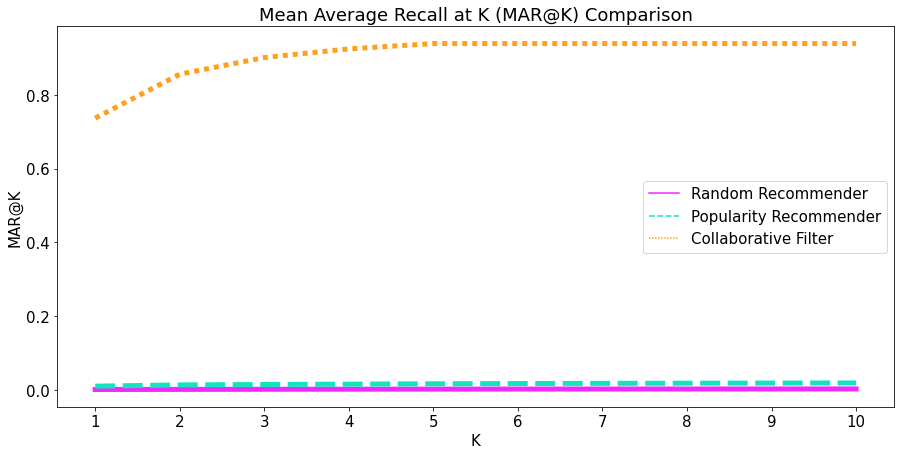

In [ ]:
#Mark Plot
mark_scores = [random_mark, pop_mark, cf_mark]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)